# Exploration CodeGeo <-> Coordonnées GPS

### Sources
GeoCodes Insee <-> Lat/Lon
- insee-coordonnees-communes-departement-region.csv
- https://www.data.gouv.fr/fr/datasets/communes-de-france-base-des-codes-postaux/#/resources
Population
- insee-estimation-population-2024.csv
- https://www.data.gouv.fr/fr/datasets/estimations-de-population/



In [121]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np

In [305]:
df = pd.read_csv('../csv/insee-coordonnees-communes-departement-region.csv')
df = df.rename(columns={"code_commune_INSEE":"codgeo"})

In [306]:
df.describe()

,code_postal,latitude,longitude,code_commune,code_region
count,39201.000000,38932.000000,38932.000000,39194.000000,38934.000000
mean,46807.475345,46.700016,2.756862,251.960606,52.116274
std,25902.873112,4.484531,4.932593,184.929582,24.394799
min,1000.000000,-21.340107,-61.779579,1.000000,1.000000
25%,24800.000000,45.132322,0.666244,103.000000,28.000000
50%,49360.000000,47.380915,2.687060,216.000000,44.000000
75%,67350.000000,48.821741,4.981116,363.000000,76.000000
max,98890.000000,51.073044,55.754522,909.000000,94.000000


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39201 entries, 0 to 39200
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   codgeo                39201 non-null  object 
 1   nom_commune_postal    39201 non-null  object 
 2   code_postal           39201 non-null  int64  
 3   libelle_acheminement  39201 non-null  object 
 4   ligne_5               3257 non-null   object 
 5   latitude              38932 non-null  float64
 6   longitude             38932 non-null  float64
 7   code_commune          39194 non-null  float64
 8   article               2580 non-null   object 
 9   nom_commune           39201 non-null  object 
 10  nom_commune_complet   39201 non-null  object 
 11  code_departement      39194 non-null  object 
 12  nom_departement       38934 non-null  object 
 13  code_region           38934 non-null  float64
 14  nom_region            38934 non-null  object 
dtypes: float64(4), int6

Let' use arbitrary min/max values to select continental France only 

In [308]:
# used GMaps to identify these coordinates
min_lat = 42
max_lat = 52
min_lon = -5
max_lon = 8

df_hex = df[df.latitude.between(min_lat, max_lat) & df.longitude.between(min_lon, max_lon)]

Let' s draw a map to get a sense of what we have left

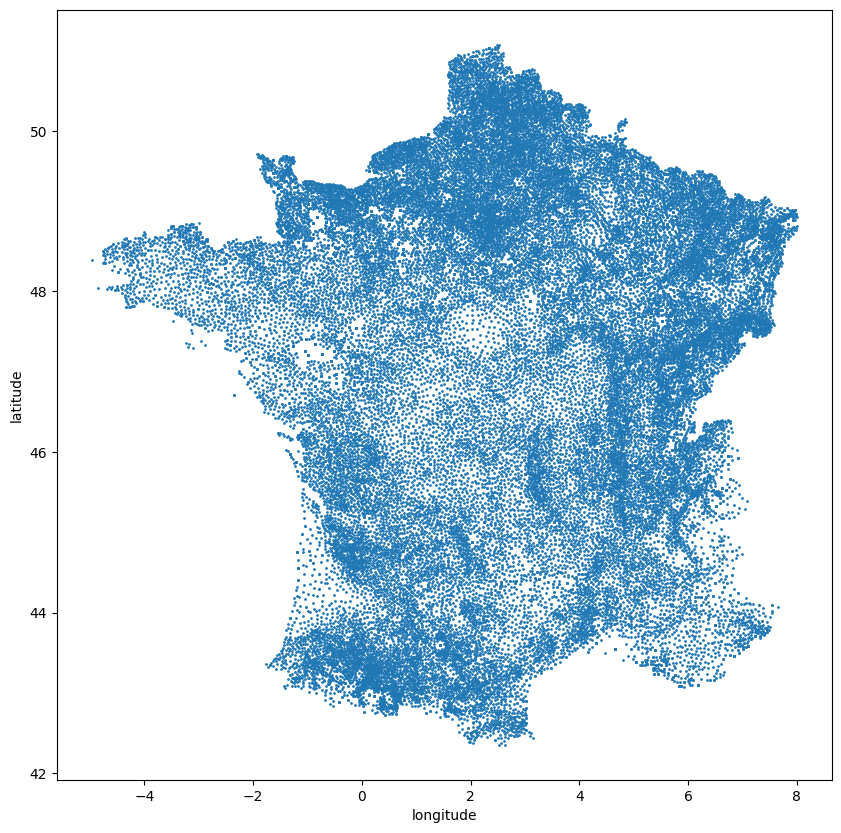

In [344]:
df_hex.plot(x="longitude", y="latitude",  kind="scatter", s=1)
plt.gcf().set_size_inches(10, 10)

In [320]:
#Additional cleanup
# Keep only necessary columns
df_hex = df_hex[["codgeo", "longitude", "latitude", "nom_commune"]]
# Adds a 0 before codgeo for departement < 10
df_hex.codgeo = np.where(df_hex.codgeo.str.len() == 4, '0' + df_hex.codgeo, df_hex.codgeo)

In [321]:
df_hex.head(20)

,codgeo,longitude,latitude,nom_commune
0,01001,4.926114,46.153426,Abergement-Clémenciat
1,01002,5.428017,46.009188,Abergement-de-Varey
2,01004,5.372926,45.960848,Ambérieu-en-Bugey
3,01005,4.912273,45.996180,Ambérieux-en-Dombes
4,01006,5.594320,45.749499,Ambléon
5,01007,5.357607,46.005591,Ambronay
6,01008,5.332809,45.936713,Ambutrix
7,01009,5.657883,45.787357,Andert-et-Condon
8,01010,5.795160,45.909372,Anglefort
9,01011,5.657815,46.205498,Apremont


In [245]:
pop = pd.read_csv('../csv/insee-estimation-population-2024.csv')

In [244]:
pop.head()

,codgeo,p21_pop
0,85062,1134.0
1,58300,1742.0
2,70137,225.0
3,51649,11454.0
4,78638,5083.0


In [246]:
pop = pop[["codgeo", "libgeo", "p21_pop"]]

In [322]:
df_hex.head(20)

,codgeo,longitude,latitude,nom_commune
0,01001,4.926114,46.153426,Abergement-Clémenciat
1,01002,5.428017,46.009188,Abergement-de-Varey
2,01004,5.372926,45.960848,Ambérieu-en-Bugey
3,01005,4.912273,45.996180,Ambérieux-en-Dombes
4,01006,5.594320,45.749499,Ambléon
5,01007,5.357607,46.005591,Ambronay
6,01008,5.332809,45.936713,Ambutrix
7,01009,5.657883,45.787357,Andert-et-Condon
8,01010,5.795160,45.909372,Anglefort
9,01011,5.657815,46.205498,Apremont


Let's join the Commune with Coordinates and the Estimation Population datasets

In [323]:
loc_with_pop = df_hex.join(pop.set_index('codgeo'), on='codgeo', how='left')

In [324]:
loc_with_pop.sort_values('p21_pop', ascending=False)

,codgeo,longitude,latitude,nom_commune,libgeo,p21_pop
13192,31555,1.431673,43.596381,Toulouse,Toulouse,504078.0
13195,31555,1.431673,43.596381,Toulouse,Toulouse,504078.0
13194,31555,1.431673,43.596381,Toulouse,Toulouse,504078.0
13191,31555,1.431673,43.596381,Toulouse,Toulouse,504078.0
13190,31555,1.431673,43.596381,Toulouse,Toulouse,504078.0
...,...,...,...,...,...,...
38084,89484,3.309975,47.916742,Volgré,NaN,NaN
38158,90073,6.885458,47.585619,Moval,NaN,NaN
38247,91182,2.412880,48.621635,Courcouronnes,NaN,NaN
38260,91222,2.132611,48.306978,Estouches,NaN,NaN


/home/jacques/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jacques/.local/lib/python3.10/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


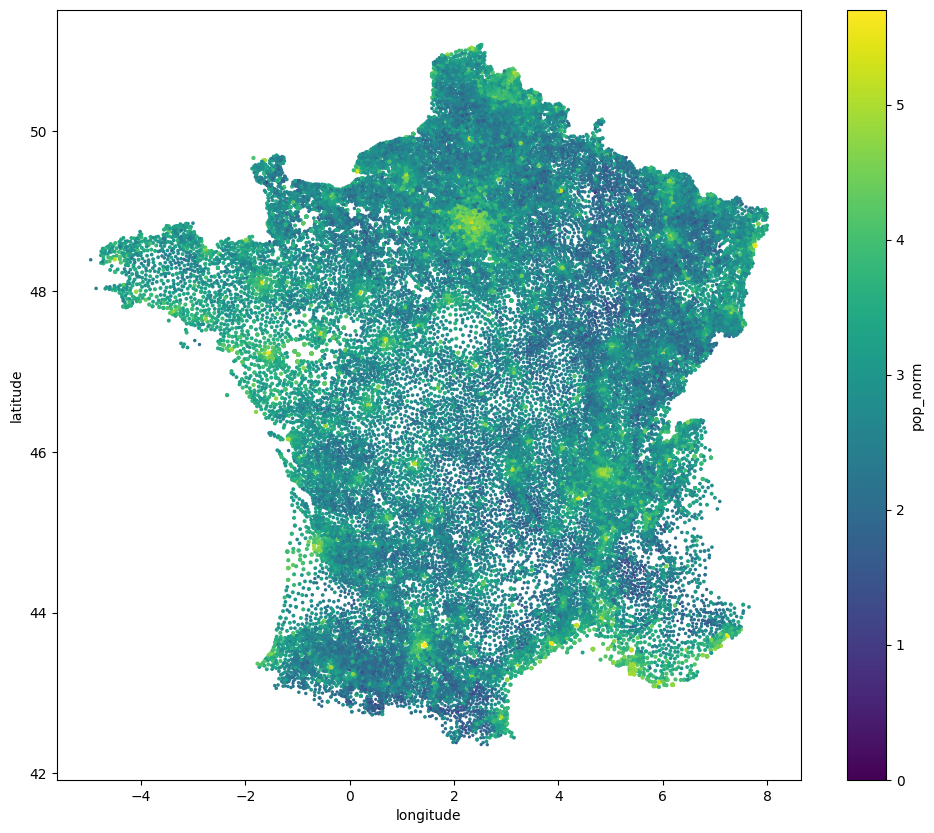

In [348]:
loc_with_pop['pop_norm'] = np.log10(loc_with_pop.p21_pop)
loc_with_pop.plot(x="longitude", y="latitude",  kind="scatter", c='pop_norm', s='pop_norm')
plt.gcf().set_size_inches(12, 10)